In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt

In [2]:
Batch=32
img_size=256
img_layers=3
epochs=10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("PlantVillage", shuffle=True, image_size=(img_size, img_size), batch_size=Batch)

Found 16011 files belonging to 10 classes.


In [4]:
labels = dataset.class_names

In [5]:
len(dataset)

501

In [6]:
for image_batch, image_label in dataset.take(1):
    print(image_batch.shape)
    print(image_label)

(32, 256, 256, 3)
tf.Tensor([1 2 7 5 7 7 7 6 1 7 9 5 7 0 5 4 4 9 2 5 0 7 4 2 9 7 6 5 1 6 5 0], shape=(32,), dtype=int32)


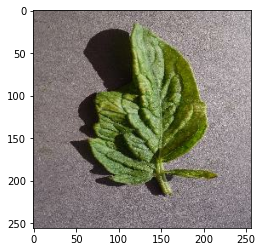

In [7]:
for image_batch, image_label in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

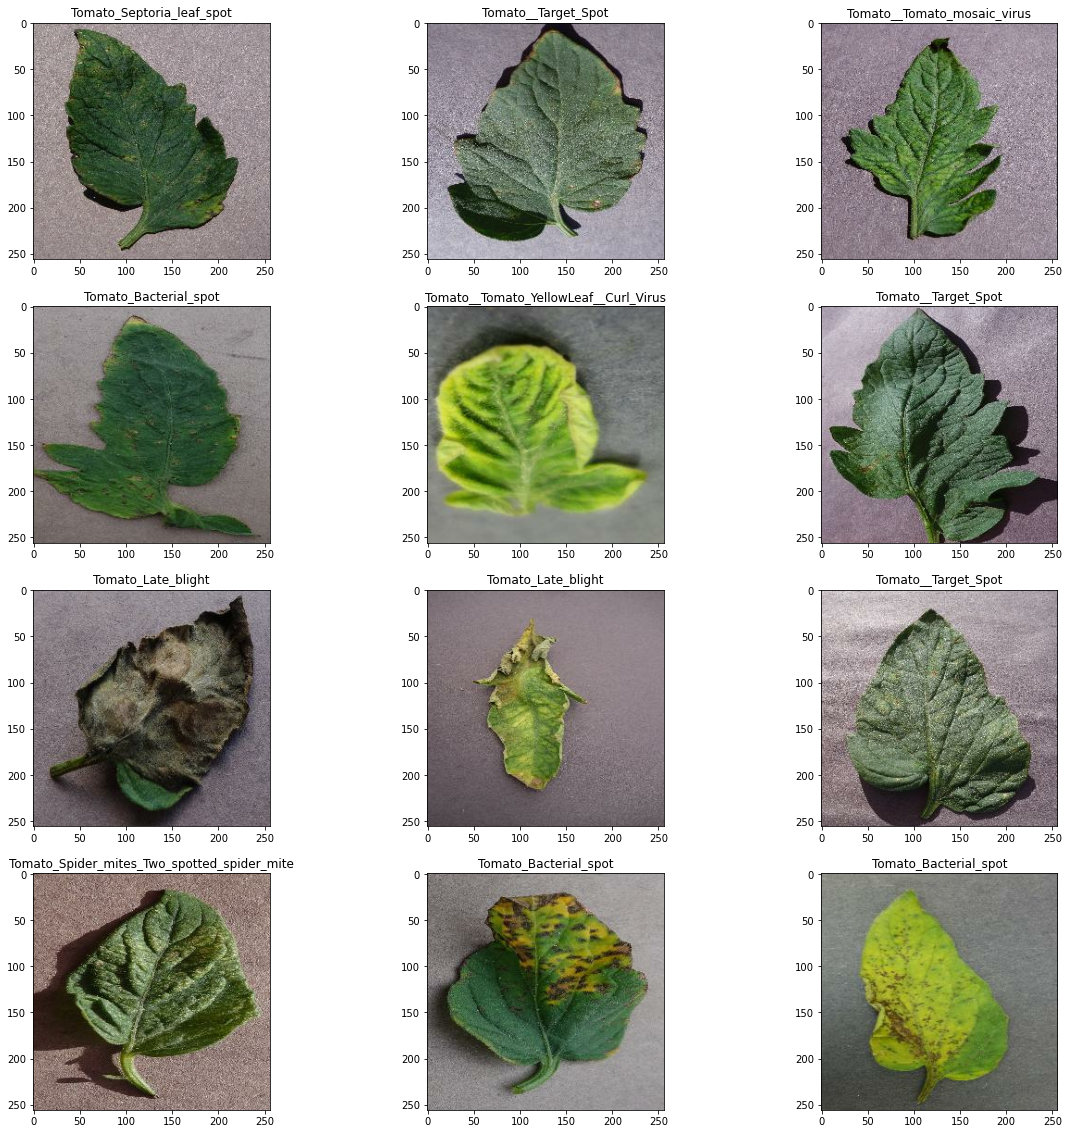

In [8]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(4,3, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(labels[label_batch[i]])

In [9]:
def get_data_partations(data, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    data_count=len(data)
    
    if shuffle:
        data=data.shuffle(shuffle_size, seed=12)
    
    train_size = int(data_count*train_split)
    val_size = int(data_count*val_split)
    
    train_data = data.take(train_size)
    val_data = data.skip(train_size).take(val_size)
    test_data = data.skip(train_size).skip(val_size)
    
    return train_data, val_data, test_data    

In [10]:
train, validate, test = get_data_partations(dataset)

In [11]:
len(test),len(train), len(validate)

(51, 400, 50)

Improve performance using Cache and Prefetch

In [12]:
train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validate = validate.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]) 

In [14]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [15]:
input_shape=(Batch, img_size, img_size, img_layers)
n_classes = len(dataset.class_names)
model = models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32, (3,4), activation = 'relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])
model.build(input_shape=input_shape)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 253, 32)        1184      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 126, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 124, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train,
    epochs=epochs,
    batch_size=Batch,
    verbose=1,
    validation_data=validate
)

Epoch 1/10
400/400 [==============================] - 2713s 6s/step - loss: 1.7198 - accuracy: 0.3789 - val_loss: 1.4351 - val_accuracy: 0.4894
Epoch 2/10
400/400 [==============================] - 1913s 5s/step - loss: 1.1791 - accuracy: 0.5858 - val_loss: 0.9660 - val_accuracy: 0.6606
Epoch 3/10
400/400 [==============================] - 1943s 5s/step - loss: 0.8283 - accuracy: 0.7152 - val_loss: 0.7424 - val_accuracy: 0.7431
Epoch 4/10
400/400 [==============================] - 3058s 8s/step - loss: 0.6163 - accuracy: 0.7835 - val_loss: 0.8564 - val_accuracy: 0.7025
Epoch 5/10
400/400 [==============================] - 4329s 11s/step - loss: 0.4946 - accuracy: 0.8251 - val_loss: 0.5308 - val_accuracy: 0.8300
Epoch 6/10
400/400 [==============================] - 5084s 13s/step - loss: 0.4343 - accuracy: 0.8498 - val_loss: 0.5230 - val_accuracy: 0.8163
Epoch 7/10
400/400 [==============================] - 5304s 13s/step - loss: 0.3616 - accuracy: 0.8716 - val_loss: 0.5292 - val_accura

In [17]:
len(dataset.class_names)

10

In [19]:
model.save("finalTomato.h5")

In [24]:
model.save("tomatoClassifier.h5")

In [16]:
new_model = models.load_model("tomato.h5")

In [17]:
score = new_model.evaluate(test)

51/51 [==============================] - 693s 2s/step - loss: 1.2096 - accuracy: 0.6958


In [18]:
print(score)

[1.2095539569854736, 0.6958410739898682]


In [23]:
import numpy as np

for image_data, image_label in test.take(1):
    first_image = image_data[0].numpy().astype("uint8")

256
